In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

import numpy as np


In [ ]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#@title read file (double-click to view) {display-mode: "form"}

id_file = "*****************" #@param {type:"string"}
 
myfile = drive.CreateFile({'id':id_file})
myfile.GetContentFile(name_file)

In [ ]:
df = pd.read_csv(name_file)
df.keys()
#df['variety']
print(df.head(3))
print('\n')
print("liste des attributs : ", list(df.columns))
print('\n')
print("nombre total d'attributs : ", len(list(df.columns))-1)

   G CSP   CITY TYPE   BASE  T
0  M   O  Paris    V  Paris  A
1  M   O  Paris    V  Paris  B
2  M   O  Paris    V  Paris  A


liste des attributs :  ['G', 'CSP', 'CITY', 'TYPE', 'BASE', 'T']


nombre total d'attributs :  5


In [ ]:
target_file = "T" #@param {type:"string"}

target = df[target_file]
target.columns = [target_file]
features_dataframe = df.loc[:, df.columns != target_file]

In [ ]:
features_dataframe = pd.get_dummies(features_dataframe) 
features_dataframe.columns

Index(['G_F', 'G_M', 'CSP_C', 'CSP_E', 'CSP_O', 'CITY_NY', 'CITY_Paris',
       'TYPE_T', 'TYPE_V', 'BASE_Lyon', 'BASE_Paris'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target.values)

k = le.transform(target.values)
print(k)
print(features_dataframe)

[0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0]
    G_F  G_M  CSP_C  CSP_E  ...  TYPE_T  TYPE_V  BASE_Lyon  BASE_Paris
0     0    1      0      0  ...       0       1          0           1
1     0    1      0      0  ...       0       1          0           1
2     0    1      0      0  ...       0       1          0           1
3     1    0      1      0  ...       0       1          0           1
4     0    1      0      1  ...       0       1          0           1
..  ...  ...    ...    ...  ...     ...     ...        ...         ...
95    1    0      0      1  ...       1       0          1           0
96    1    0      1      0  ...       1       0          1           0
97    0    1      0      1  ...       1       0          1           0
98    0    1      0      1  ...       1       0          1           0
99    0    1   

In [ ]:
from sklearn.model_selection import train_test_split

X = features_dataframe
y = k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3 )
clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

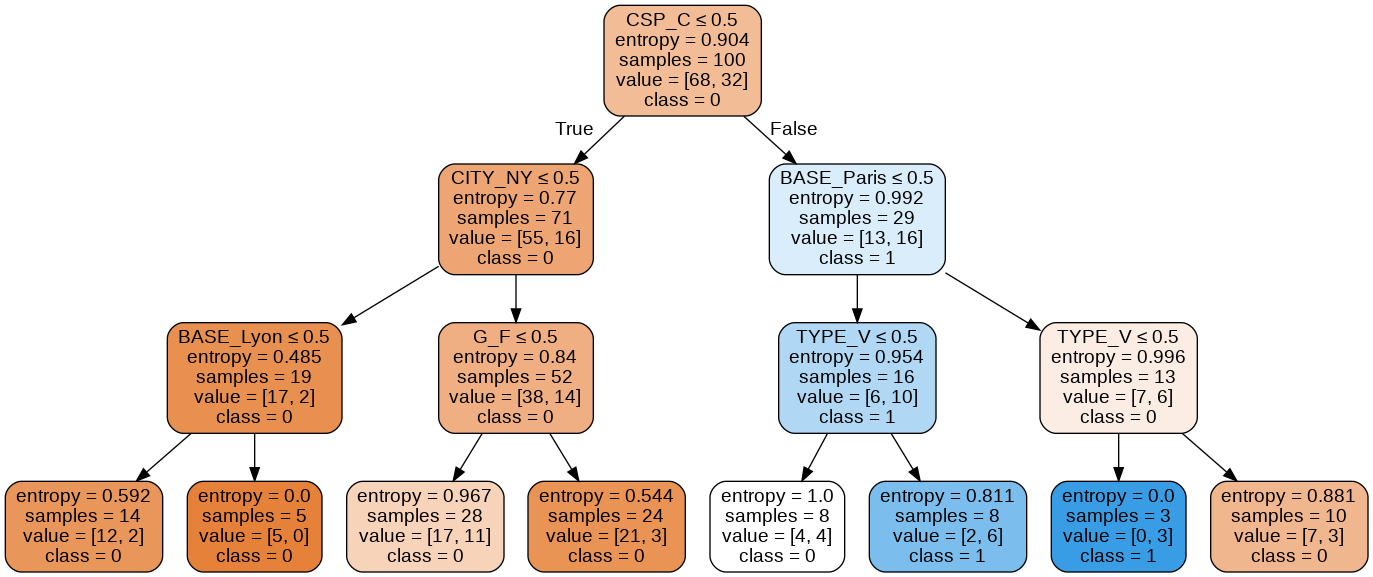

In [ ]:
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO
from IPython.display import Image

import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, 
                special_characters = True ,
                feature_names = features_dataframe.columns,
                class_names=['0','1'],
                rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())